In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Load datasets
developed_df = pd.read_csv("CO2_Developed Countries.csv")
developing_df = pd.read_csv("CO2_Developing Countries.csv")

In [3]:
# Filter rows with the specified unit
developed_df = developed_df[developed_df["Unit"] == "Millions of Metric tons of CO2"]
developing_df = developing_df[developing_df["Unit"] == "Millions of Metric tons of CO2"]

In [4]:
# Drop unnecessary columns
columns_to_drop = ['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
                   'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Scale']
developed_df = developed_df.drop(columns=columns_to_drop)
developing_df = developing_df.drop(columns=columns_to_drop)

In [5]:
# KNN Imputation for missing values
def knn_impute(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    return df

developed_df = knn_impute(developed_df)
developing_df = knn_impute(developing_df)

In [6]:
# Add a label column for grouping
developed_df['Group'] = 'Developed'
developing_df['Group'] = 'Developing'

In [7]:
# Combine both datasets
combined_df = pd.concat([developed_df, developing_df])

In [8]:
# Reshape for analysis
emissions_long = combined_df.melt(id_vars=['Country', 'Group'], 
                                  var_name='Year', value_name='Emissions')
emissions_long['Year'] = emissions_long['Year'].str.replace('F', '').astype(int)

In [9]:
# Descriptive Statistics
stats = emissions_long.groupby("Group")["Emissions"].describe()
print(stats)

              count      mean        std  min    25%    50%      75%       max
Group                                                                         
Developed   39960.0  5.797774  58.881135  0.0  0.041  0.256  1.55825  2512.903
Developing  31320.0  8.936111  94.967010  0.0  0.025  0.219  1.70625  4738.688


In [10]:
# Statistical Test: Independent t-test
from scipy.stats import ttest_ind

developed_emissions = emissions_long[emissions_long['Group'] == 'Developed']['Emissions']
developing_emissions = emissions_long[emissions_long['Group'] == 'Developing']['Emissions']
t_stat, p_val = ttest_ind(developed_emissions, developing_emissions, nan_policy='omit')
print(f"T-test results: t-stat = {t_stat}, p-value = {p_val}")

T-test results: t-stat = -5.411013250350106, p-value = 6.287053328207565e-08


In [11]:
# Plotting
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

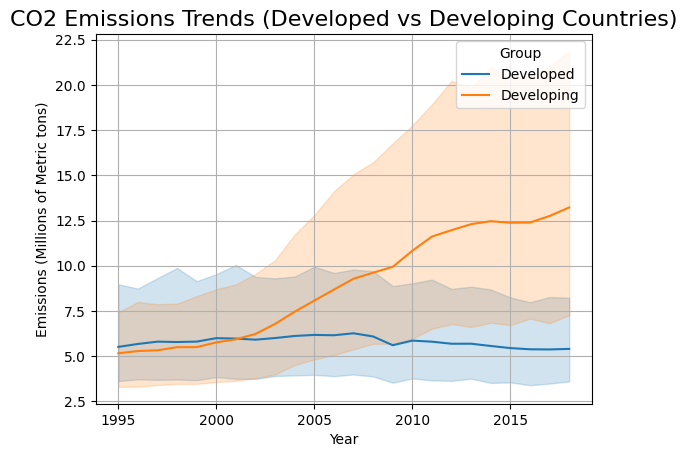

In [ ]:
# Line plot
sns.lineplot(data=emissions_long, x="Year", y="Emissions", hue="Group")
plt.title("CO2 Emissions Trends (Developed vs Developing Countries)", fontsize=16)
plt.ylabel("Emissions (Millions of Metric tons)")
plt.xlabel("Year")
plt.legend(title="Group")
plt.grid()
plt.show()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_6232\3677730487.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=emissions_long, x="Year", y="Emissions", hue="Group", ci="sd")


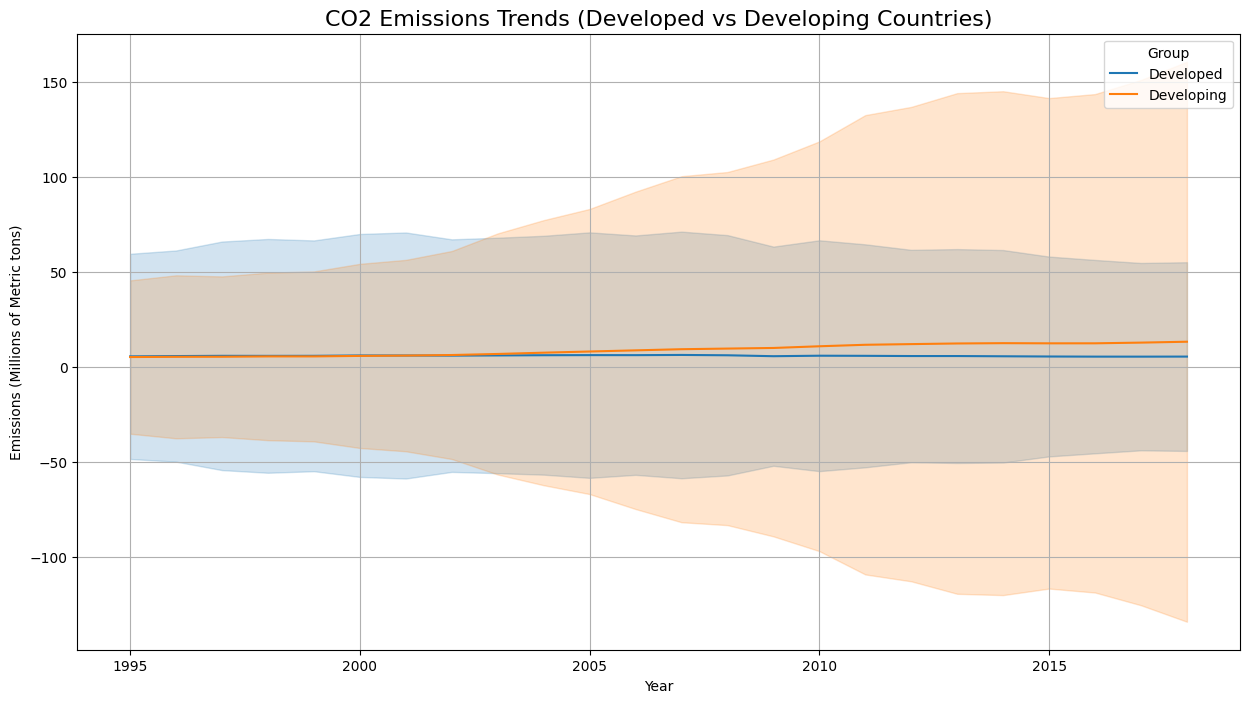

In [15]:
# Trend Analysis: Extended Line Plot with Confidence Intervals
plt.figure(figsize=(15, 8))
sns.lineplot(data=emissions_long, x="Year", y="Emissions", hue="Group", ci="sd")
plt.title("CO2 Emissions Trends (Developed vs Developing Countries)", fontsize=16)
plt.ylabel("Emissions (Millions of Metric tons)")
plt.xlabel("Year")
plt.legend(title="Group")
plt.grid()
plt.show()

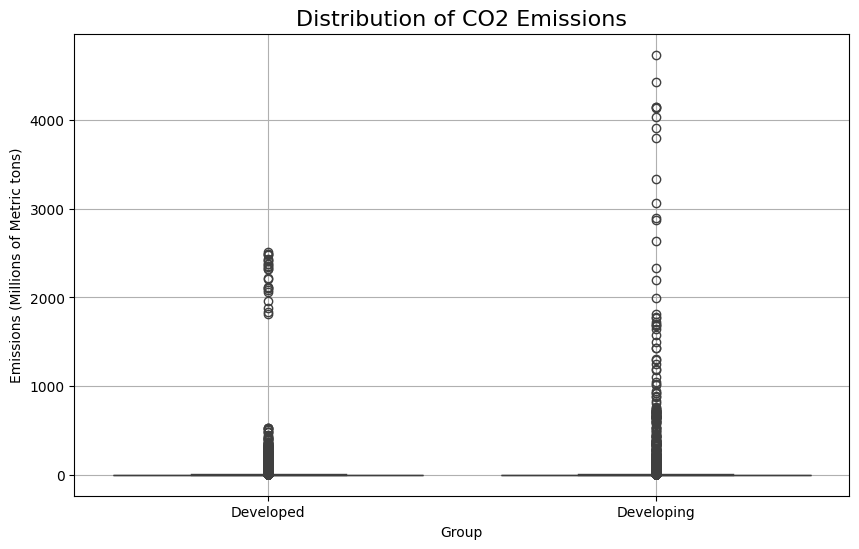

In [13]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=emissions_long, x="Group", y="Emissions")
plt.title("Distribution of CO2 Emissions", fontsize=16)
plt.ylabel("Emissions (Millions of Metric tons)")
plt.xlabel("Group")
plt.grid()
plt.show()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_6232\642341675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_emissions, x="Group", y="Emissions", palette="Set2")


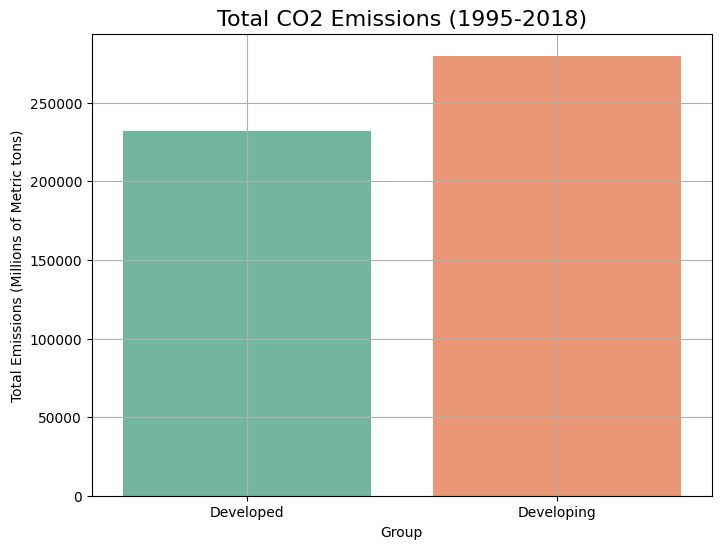

In [14]:
# Bar plot for total emissions
total_emissions = emissions_long.groupby("Group")["Emissions"].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=total_emissions, x="Group", y="Emissions", palette="Set2")
plt.title("Total CO2 Emissions (1995-2018)", fontsize=16)
plt.ylabel("Total Emissions (Millions of Metric tons)")
plt.xlabel("Group")
plt.grid()
plt.show()

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_6232\997865167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=emissions_long, x="Group", y="Emissions", scale='width', inner='quartile', palette="muted")
C:\Users\Rajesh\AppData\Local\Temp\ipykernel_6232\997865167.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=emissions_long, x="Group", y="Emissions", scale='width', inner='quartile', palette="muted")


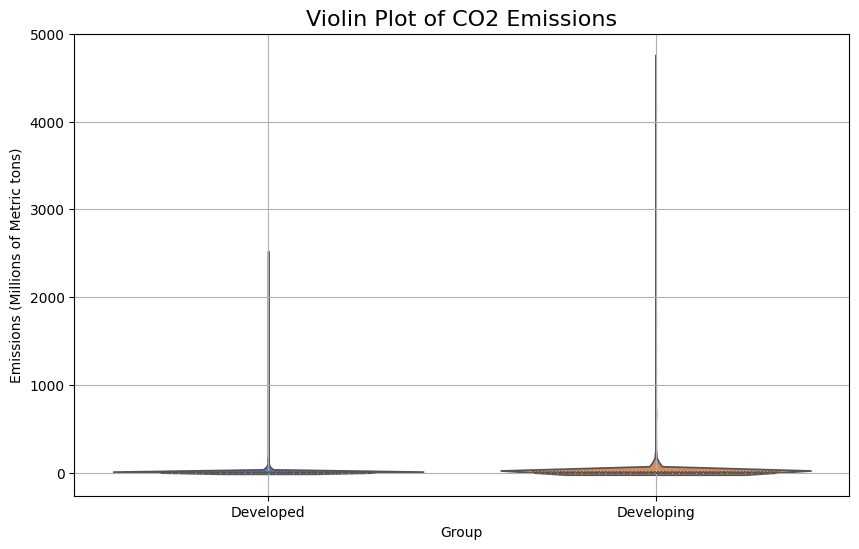

In [16]:
# Violin Plot: Distribution Analysis
plt.figure(figsize=(10, 6))
sns.violinplot(data=emissions_long, x="Group", y="Emissions", scale='width', inner='quartile', palette="muted")
plt.title("Violin Plot of CO2 Emissions", fontsize=16)
plt.ylabel("Emissions (Millions of Metric tons)")
plt.xlabel("Group")
plt.grid()
plt.show()

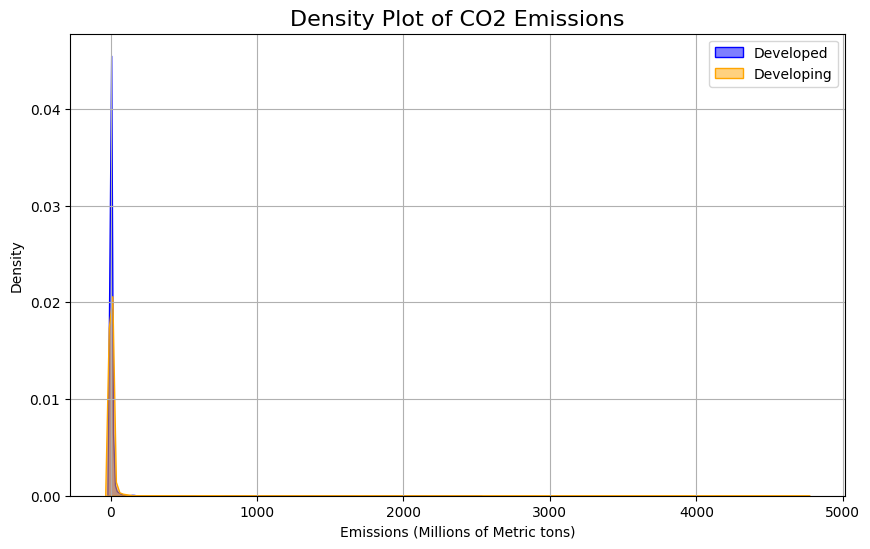

In [17]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(developed_emissions, label="Developed", fill=True, color="blue", alpha=0.5)
sns.kdeplot(developing_emissions, label="Developing", fill=True, color="orange", alpha=0.5)
plt.title("Density Plot of CO2 Emissions", fontsize=16)
plt.xlabel("Emissions (Millions of Metric tons)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [18]:
# Proportion Analysis: Percentage of Global Emissions
total_emissions_by_group = emissions_long.groupby("Group")["Emissions"].sum()
global_total = total_emissions_by_group.sum()
proportions = (total_emissions_by_group / global_total) * 100

print("Percentage of Global Emissions by Group:")
print(proportions)

Percentage of Global Emissions by Group:
Group
Developed     45.288907
Developing    54.711093
Name: Emissions, dtype: float64


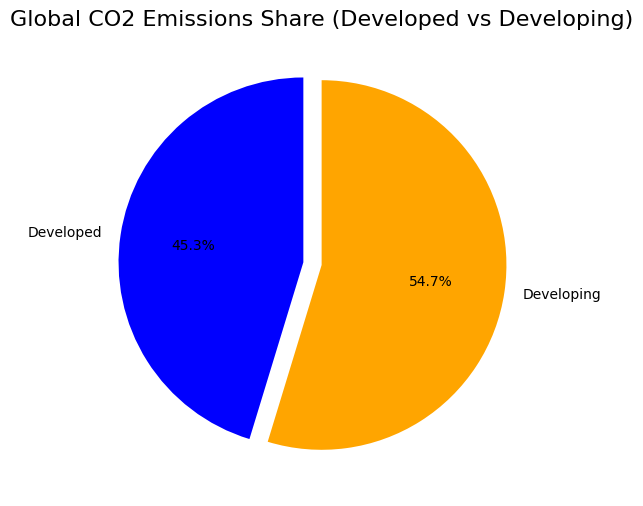

In [19]:
# Pie Chart
plt.figure(figsize=(8, 6))
proportions.plot(kind='pie', autopct='%1.1f%%', colors=["blue", "orange"], startangle=90, explode=(0.1, 0))
plt.title("Global CO2 Emissions Share (Developed vs Developing)", fontsize=16)
plt.ylabel("")  # Hide y-axis label for pie chart
plt.show()

In [20]:
# Growth Rate Analysis
growth_rates = emissions_long.pivot_table(index="Year", columns="Group", values="Emissions").pct_change()
mean_growth_rate = growth_rates.mean() * 100  # Convert to percentage

print("Average Annual Growth Rate (1995-2018):")
print(mean_growth_rate)

Average Annual Growth Rate (1995-2018):
Group
Developed    -0.055545
Developing    4.216961
dtype: float64


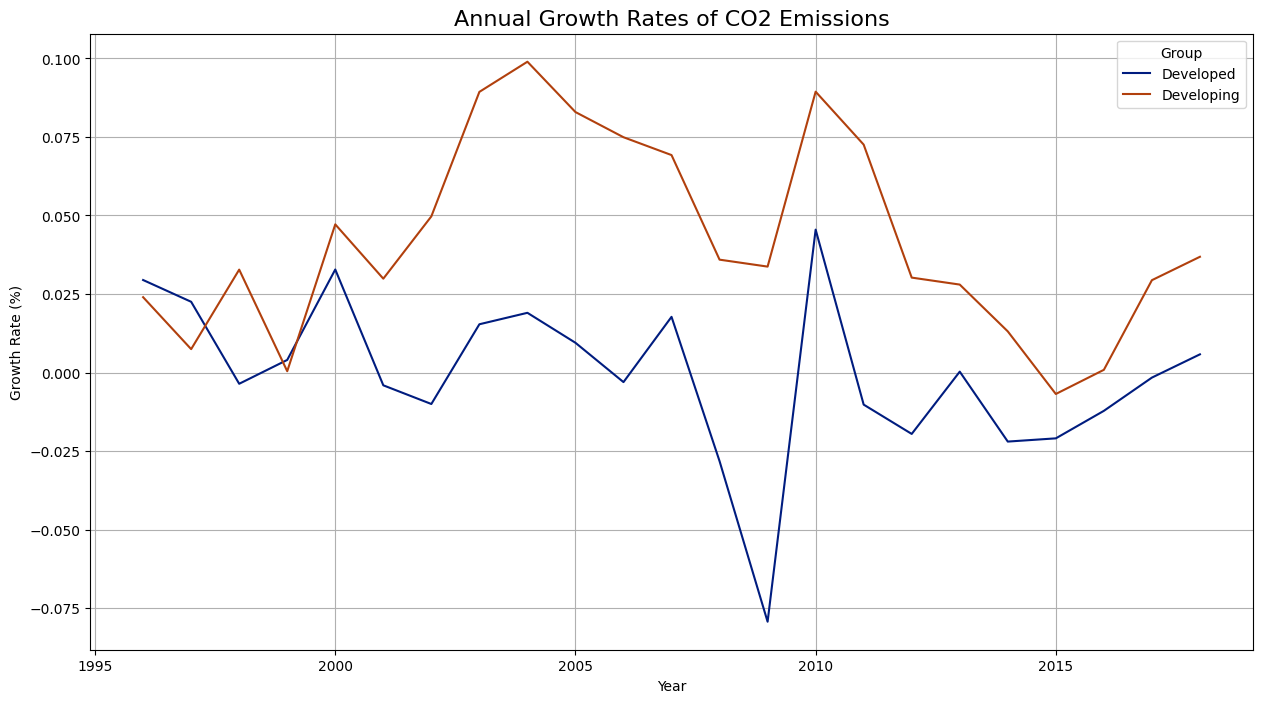

In [21]:
# Line Plot for Growth Rates
plt.figure(figsize=(15, 8))
sns.lineplot(data=growth_rates, dashes=False, palette="dark")
plt.title("Annual Growth Rates of CO2 Emissions", fontsize=16)
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.legend(title="Group")
plt.grid()
plt.show()

<hr>

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [27]:
# Load the datasets
developed_df = pd.read_csv("CO2_Developed Countries.csv")
developing_df = pd.read_csv("CO2_Developing Countries.csv")

In [28]:
# Preprocessing
# Filter rows where 'Unit' is 'Millions of Metric tons of CO2'
developed_df = developed_df[developed_df['Unit'] == 'Millions of Metric tons of CO2']
developing_df = developing_df[developing_df['Unit'] == 'Millions of Metric tons of CO2']

In [29]:
# Clean column names
developed_df.columns = developed_df.columns.str.strip()
developing_df.columns = developing_df.columns.str.strip()

In [30]:
# Fill missing values using KNN Imputation (row-wise)
def knn_impute(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

developed_df = knn_impute(developed_df)
developing_df = knn_impute(developing_df)

In [31]:
# Extract the columns for analysis (years)
years = [col for col in developed_df.columns if col.startswith("F")]

In [32]:
# Group emissions by Industry for Developed and Developing countries
industry_emissions_developed = developed_df.groupby("Industry").sum().loc[:, years].sum(axis=1)
industry_emissions_developing = developing_df.groupby("Industry").sum().loc[:, years].sum(axis=1)

In [33]:
# Combine into a DataFrame for easier comparison
industry_comparison = pd.DataFrame({
    "Developed": industry_emissions_developed,
    "Developing": industry_emissions_developing
}).fillna(0)  # Fill NaN with 0 if any industry is missing in one group

In [34]:
# Add a column for percentage contribution
industry_comparison["Total"] = industry_comparison["Developed"] + industry_comparison["Developing"]
industry_comparison["Developed (%)"] = (industry_comparison["Developed"] / industry_comparison["Total"]) * 100
industry_comparison["Developing (%)"] = (industry_comparison["Developing"] / industry_comparison["Total"]) * 100

In [ ]:
# Sort by total emissions
industry_comparison = industry_comparison.sort_values("Total", ascending=False)

In [36]:
# Display the top industries contributing to CO2 emissions
print("Top Industries by Total Emissions:")
print(industry_comparison.head(10))

Top Industries by Total Emissions:
                                                     Developed  Developing  \
Industry                                                                     
Electricity, gas, steam and air conditioning su...  106138.855  125731.962   
Basic metals                                         13991.846   40147.991   
Other non-metallic mineral products                   5798.313   17432.549   
Land transport and transport via pipelines            9979.293   10598.949   
Coke and refined petroleum products                   9526.043    8531.087   
Air transport                                        12039.173    5231.596   
Water transport                                       9416.421    6956.992   
Chemicals and pharmaceutical products                 5894.571    9116.881   
Mining and quarrying, energy producing products       5883.465    5758.836   
Agriculture, hunting, forestry                        4531.073    5966.567   

                            

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_6232\2644906020.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

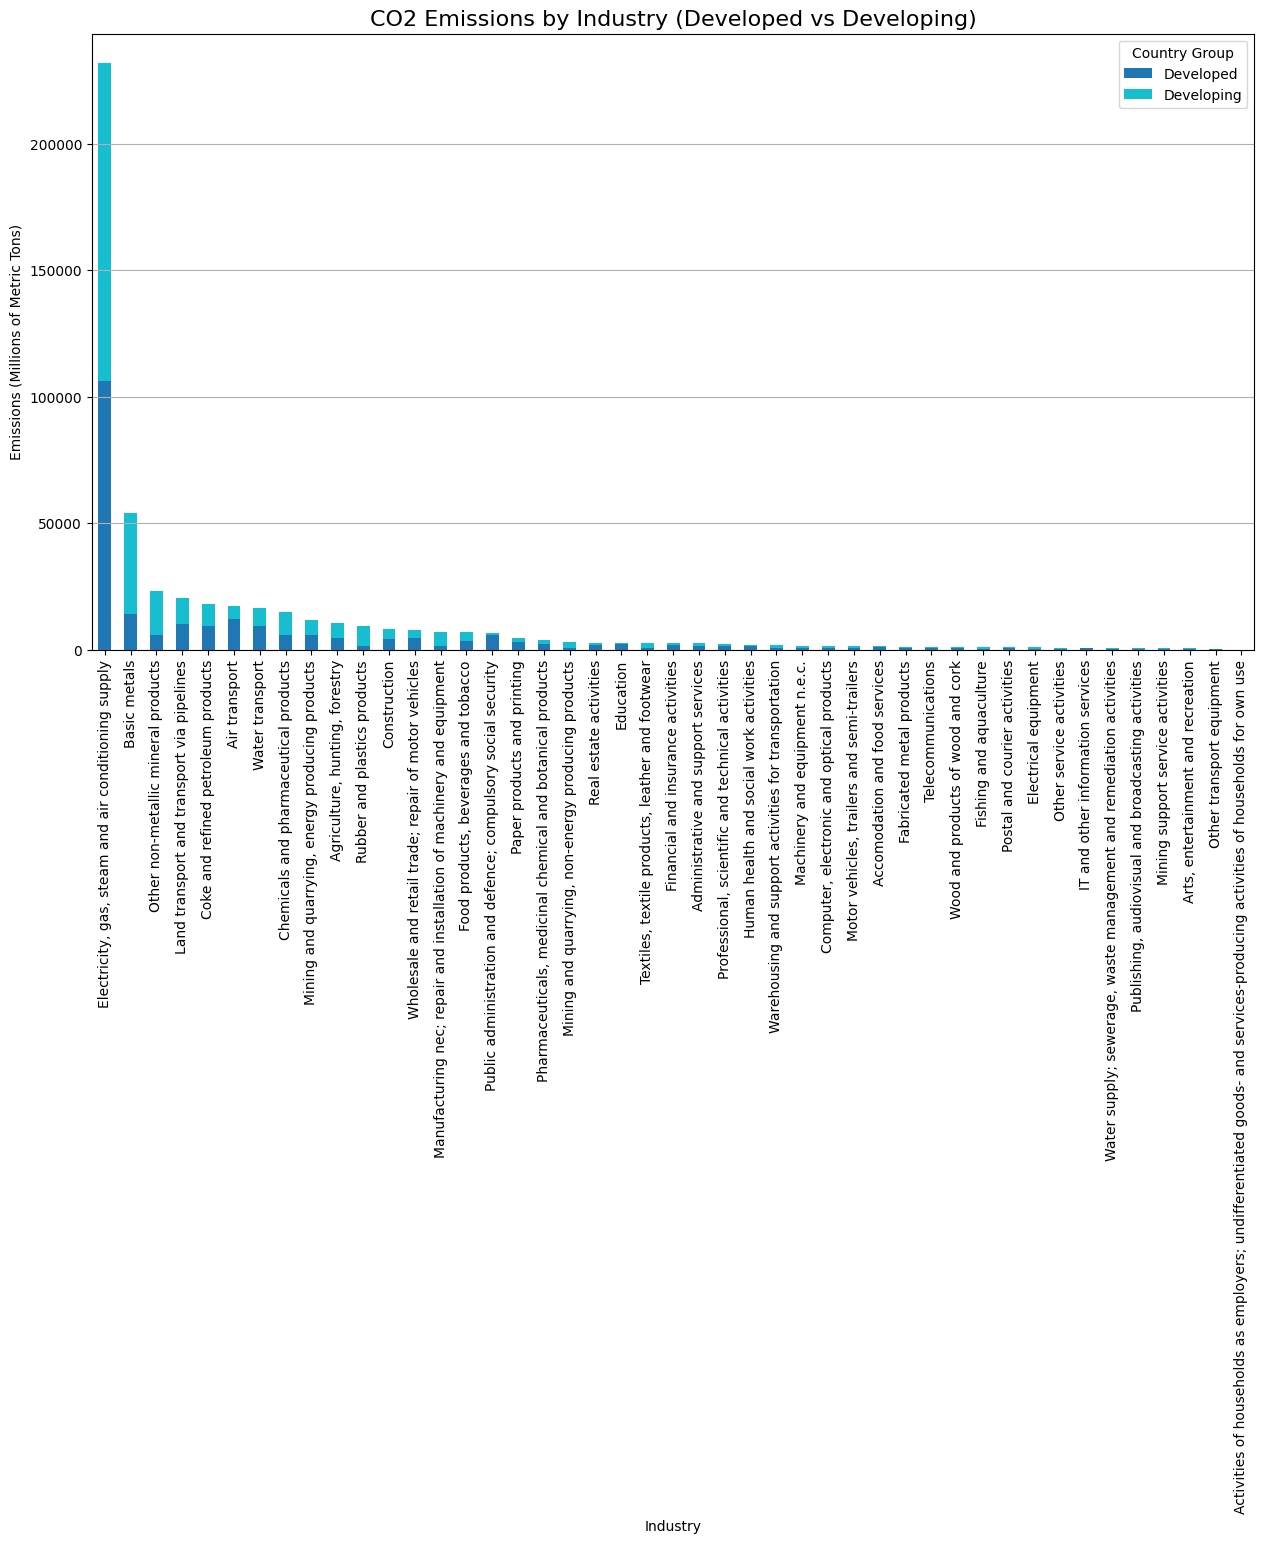

In [37]:
# Visualization: Bar Chart
plt.figure(figsize=(15, 8))
industry_comparison[["Developed", "Developing"]].plot(kind="bar", stacked=True, figsize=(15, 8), colormap="tab10")
plt.title("CO2 Emissions by Industry (Developed vs Developing)", fontsize=16)
plt.ylabel("Emissions (Millions of Metric Tons)")
plt.xlabel("Industry")
plt.xticks(rotation=90)
plt.legend(title="Country Group")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

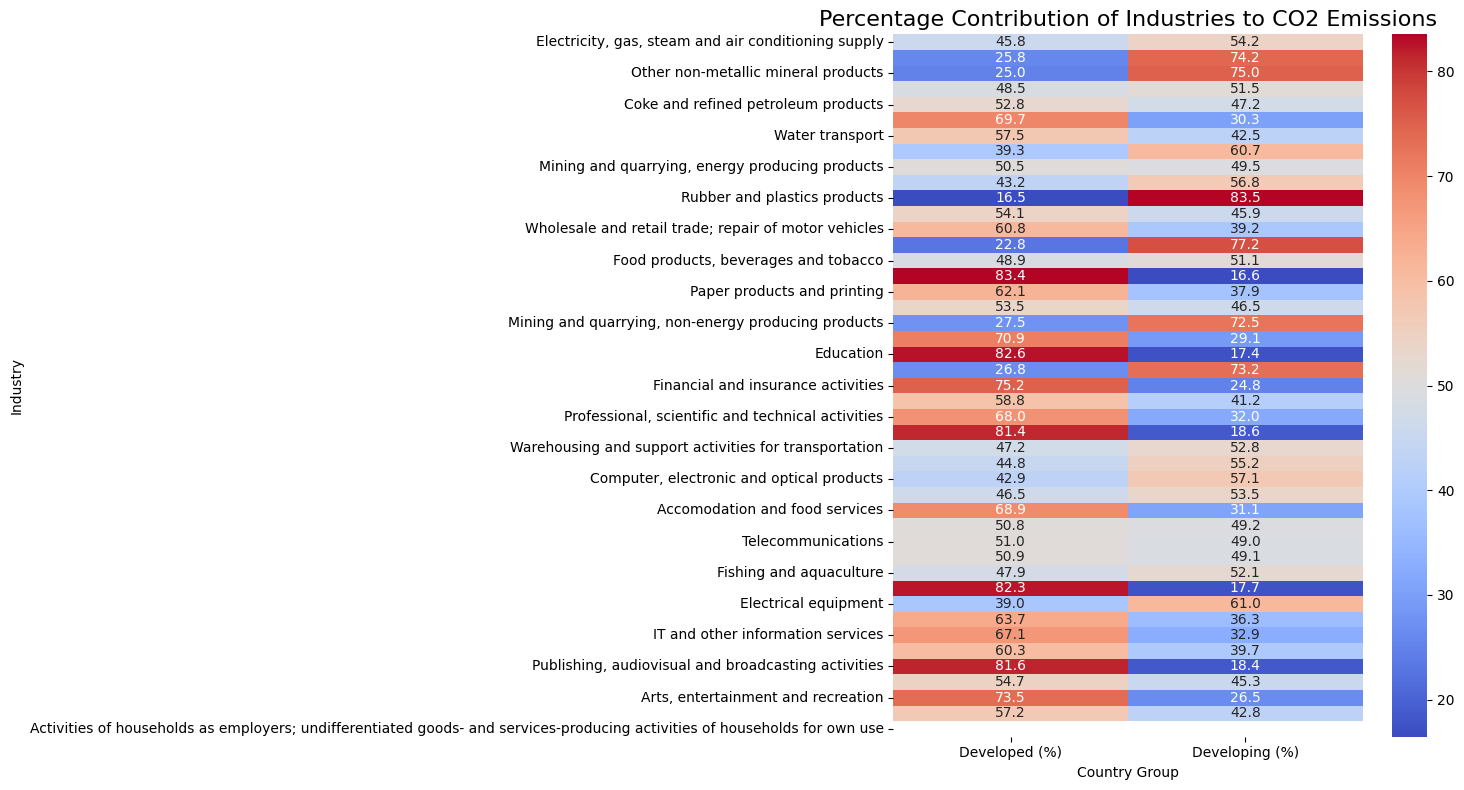

In [56]:
# Visualization: Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(industry_comparison[["Developed (%)", "Developing (%)"]], annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Percentage Contribution of Industries to CO2 Emissions", fontsize=16)
plt.ylabel("Industry")
plt.xlabel("Country Group")
plt.tight_layout()
plt.show()

In [41]:
# Display descriptive statistics
print("Descriptive Statistics for CO2 Emissions (Developed vs Developing):")
print(industry_comparison.describe())

Descriptive Statistics for CO2 Emissions (Developed vs Developing):
           Developed     Developing          Total  Developed (%)  \
count      45.000000      45.000000      45.000000      44.000000   
mean     5148.423267    6219.533244   11367.956511      54.126372   
std     15772.707570   19391.107376   34926.229454      17.234996   
min         0.000000       0.000000       0.000000      16.460643   
25%       529.257000     472.997000     963.919000      45.536212   
50%      1555.016000     886.720000    2662.958000      53.123978   
75%      4531.073000    5231.596000    8198.030000      67.318181   
max    106138.855000  125731.962000  231870.817000      83.411193   

       Developing (%)  
count       44.000000  
mean        45.873628  
std         17.234996  
min         16.588807  
25%         32.681819  
50%         46.876022  
75%         54.463788  
max         83.539357  


In [43]:
# Visualization: Pie Charts for Percentage Contribution
top_industries = industry_comparison.head(10)

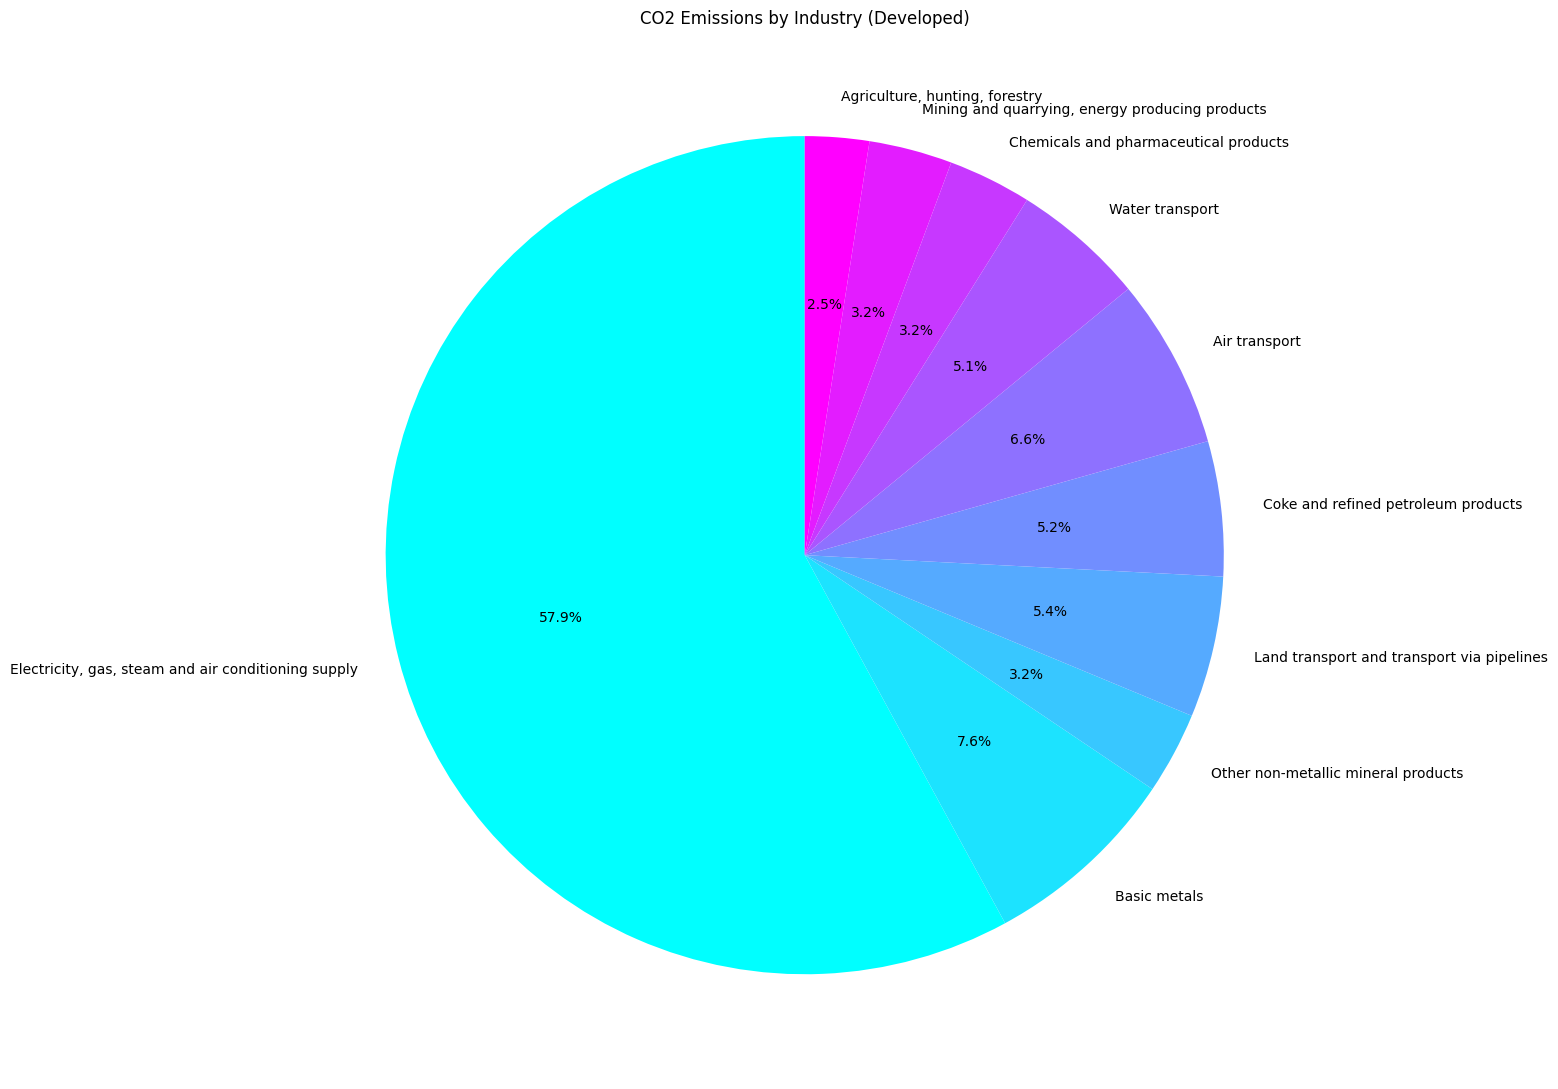

In [55]:
# Pie chart for Developed
plt.figure(figsize=(25, 11))
top_industries["Developed"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="cool")
plt.title("CO2 Emissions by Industry (Developed)")
plt.ylabel("")
plt.tight_layout()
plt.show()

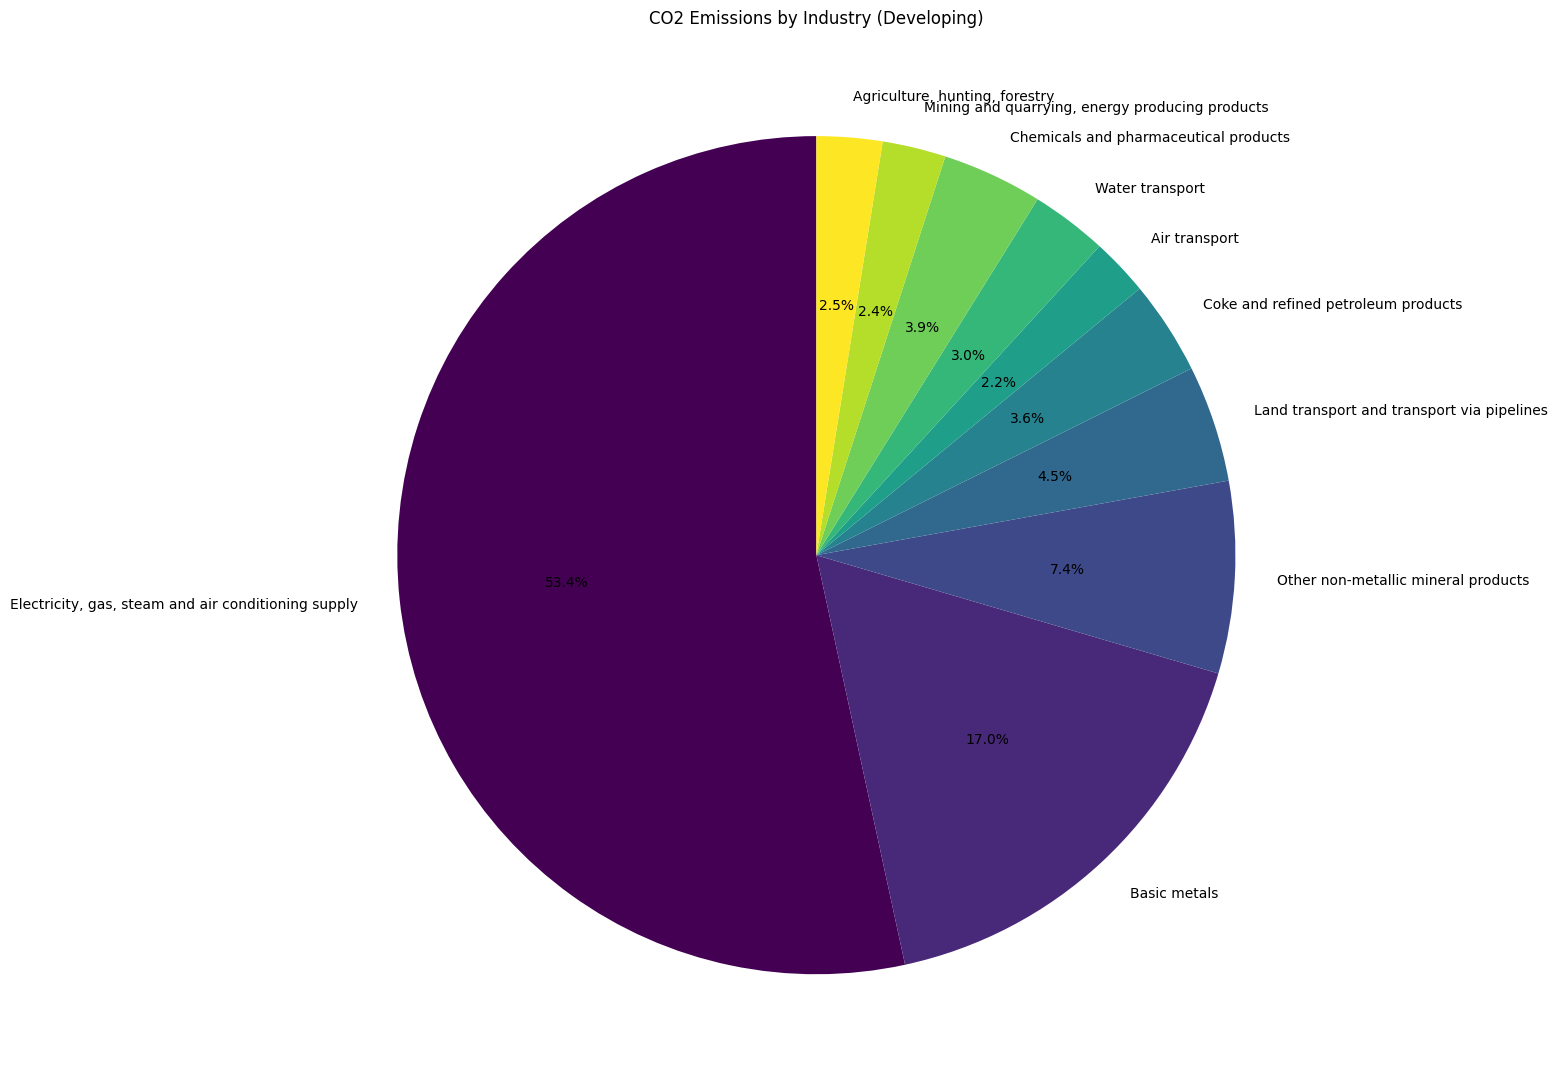

In [54]:
# Pie chart for Developing
plt.figure(figsize=(25, 11))
top_industries["Developing"].plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("CO2 Emissions by Industry (Developing)")
plt.ylabel("")
plt.tight_layout()
plt.show()

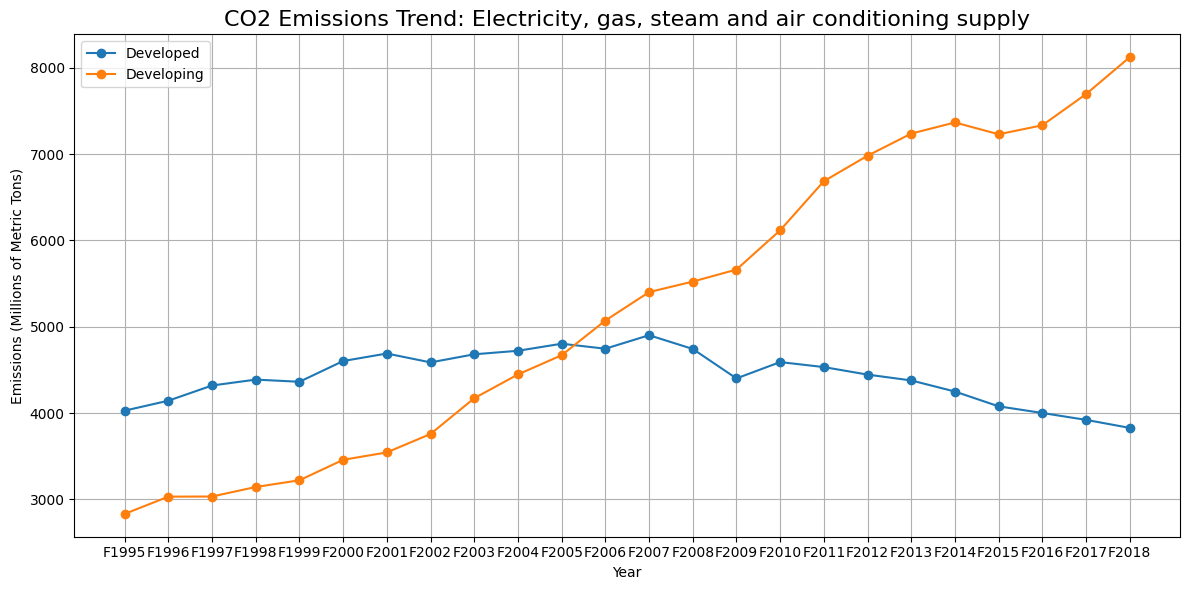

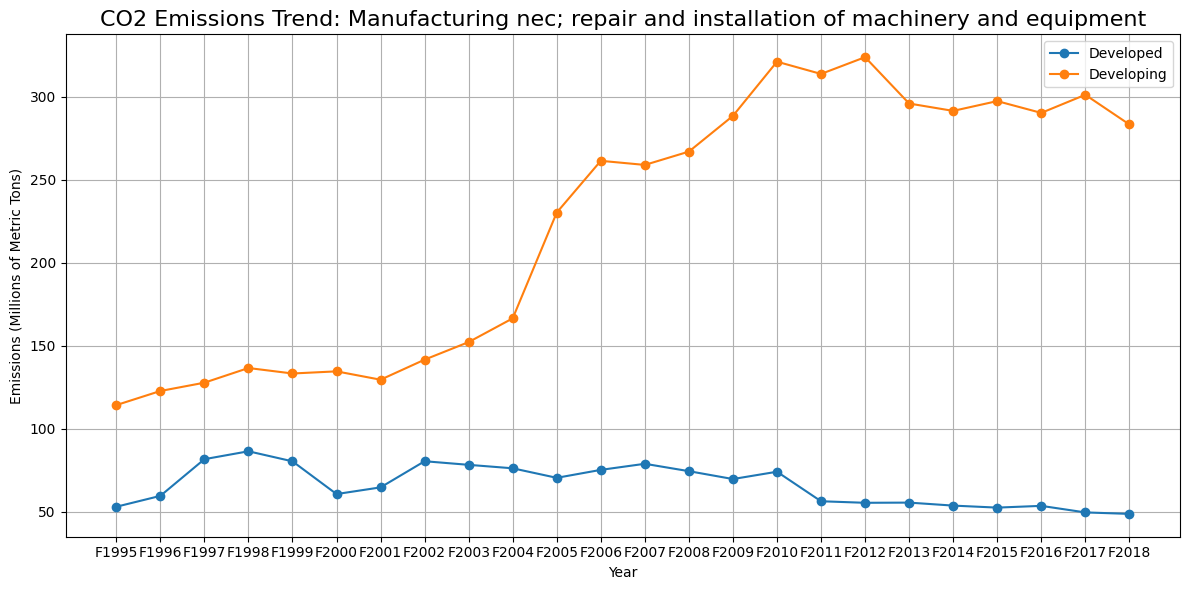

In [47]:
# Trend Analysis: Top Industries Over Time
selected_industries = ["Electricity, gas, steam and air conditioning supply", "Manufacturing nec; repair and installation of machinery and equipment"]

for industry in selected_industries:
    developed_trend = developed_df[developed_df["Industry"] == industry].loc[:, years].sum()
    developing_trend = developing_df[developing_df["Industry"] == industry].loc[:, years].sum()
    
    plt.figure(figsize=(12, 6))
    plt.plot(years, developed_trend, label="Developed", marker="o")
    plt.plot(years, developing_trend, label="Developing", marker="o")
    plt.title(f"CO2 Emissions Trend: {industry}", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Emissions (Millions of Metric Tons)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [48]:
# Statistical Test: T-Test for Top Industries
top_industries_list = industry_comparison.head(10).index
t_test_results = {}
for industry in top_industries_list:
    developed_values = developed_df[developed_df["Industry"] == industry].loc[:, years].sum(axis=1)
    developing_values = developing_df[developing_df["Industry"] == industry].loc[:, years].sum(axis=1)
    t_stat, p_val = ttest_ind(developed_values, developing_values, equal_var=False, nan_policy='omit')
    t_test_results[industry] = {"t-statistic": t_stat, "p-value": p_val}

In [49]:
# Display t-test results
print("\nT-Test Results for Top Industries (Developed vs Developing):")
t_test_df = pd.DataFrame(t_test_results).T
print(t_test_df)


T-Test Results for Top Industries (Developed vs Developing):
                                                    t-statistic   p-value
Electricity, gas, steam and air conditioning su...    -0.540267  0.591456
Basic metals                                          -1.161212  0.254968
Other non-metallic mineral products                   -1.058385  0.298697
Land transport and transport via pipelines            -0.525870  0.600861
Coke and refined petroleum products                   -0.261829  0.794320
Air transport                                          0.885875  0.380745
Water transport                                        0.117444  0.906992
Chemicals and pharmaceutical products                 -0.713148  0.480600
Mining and quarrying, energy producing products       -0.382385  0.703547
Agriculture, hunting, forestry                        -0.870069  0.389215
